# Regularization
This notebook compares simple linear models with complicated and overfit polynomial models and shows how regularization can prevent over-fitting by penalizing complexity.

## Generate Test Data

In [819]:
import matplotlib.pyplot as plt
import numpy as np

DATA_SIZE = 30

In [820]:
# Generate linear data, get x and y into the same format
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=DATA_SIZE, n_features=1)
y = np.array([[i] for i in y])

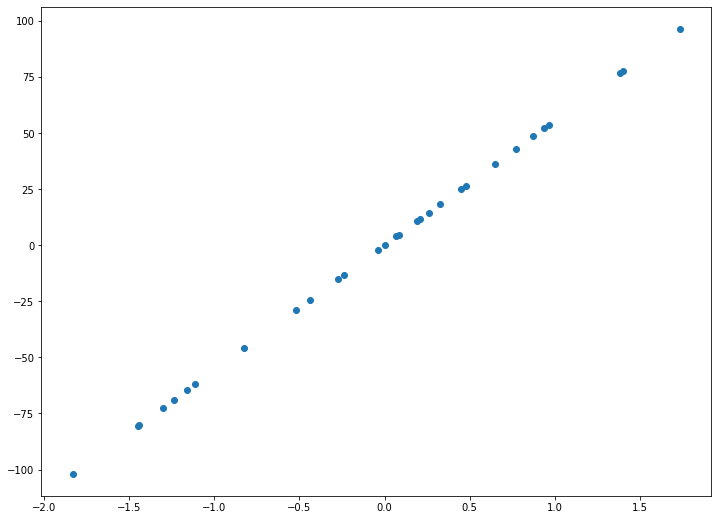

In [821]:
plt.scatter(X, y)

In [822]:
# Add gaussian noise so that the data will resemble real-life data
mu, sigma = 0, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, DATA_SIZE)
s = np.array([[i] for i in s])
y = y + s


# Min-max scale to the range [0, 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler = MinMaxScaler()
scaler.fit(y)
y = scaler.transform(y)

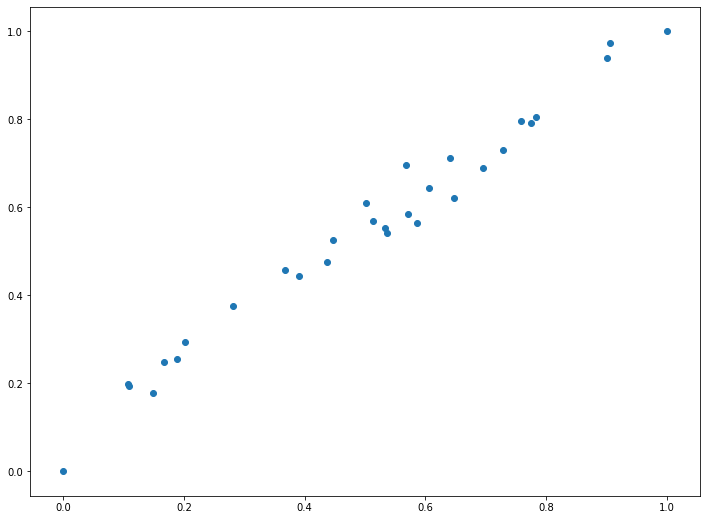

In [823]:
plt.scatter(X, y)

In [824]:
# Split the x,y data into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Create Simple Regression Models
Create two regression models: one that matches the data and one that doesn't.

In [825]:
# Simple linear regression model.
from sklearn.linear_model import LinearRegression

simple_regression = LinearRegression().fit(X_train, y_train)
simple_regression.coef_, simple_regression.intercept_ 

(array([[0.93858496]]), array([0.06935376]))

In [826]:
# Simple linear regression model with coefficients that don't fit the data well.
bad_regression = LinearRegression()
bad_regression.coef_ = np.array([[0.6]])
bad_regression.intercept_ = np.array([0.2])

In [827]:
# Simple regression: get the y-values for 0 and 1, the min and max of the data, so we can draw a line
simple_reg_y_1, simple_reg_y_2 = simple_regression.predict(np.array([[0], [1]]))
simple_reg_y_1, simple_reg_y_2

(array([0.06935376]), array([1.00793872]))

In [828]:
# Bad regression: get the y-values for 0 and 1, the min and max of the data, so we can draw a line
bad_reg_y_1, bad_reg_y_2 = bad_regression.predict(np.array([[0], [1]]))
bad_reg_y_1, bad_reg_y_2

(array([0.2]), array([0.8]))

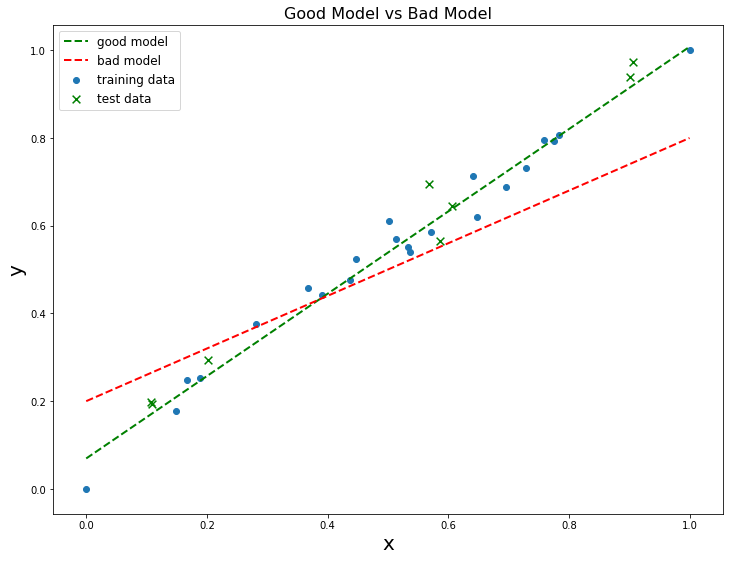

In [829]:
# Plot the good regression model vs the bad model
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('y', fontsize=20)
ax1.set_xlabel('x', fontsize=20)
ax1.set_title('Good Model vs Bad Model', fontsize=16)

plt.scatter(X_train, y_train, label="training data")
plt.scatter(X_test, y_test, label="test data", color="green", marker="x", s=60)

plt.plot([0, 1], [simple_reg_y_1, simple_reg_y_2], color='green', linestyle='dashed', linewidth=2, markersize=12, label="good model")
plt.plot([0, 1], [bad_reg_y_1, bad_reg_y_2], color='red', linestyle='dashed', linewidth=2, markersize=12, label="bad model")

plt.legend(prop={'size': 12})

## Evaluate Simple Model Error

In [830]:
# Calculate error for the good model: train and test
from sklearn.metrics import mean_squared_error

y_train_pred = simple_regression.predict(y_train)
y_test_pred = simple_regression.predict(y_test)

mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test)

(0.0014912697482049634, 0.0015306919645133583)

In [831]:
# Calculate error for the bad model: train and test.
bad_y_train_pred = bad_reg.predict(y_train)
bad_y_test_pred = bad_reg.predict(y_test)

mean_squared_error(bad_y_train_pred, y_train), mean_squared_error(bad_y_test_pred, y_test)

(0.008682378277988793, 0.01417583841436334)

## Unregularized vs Regularized High-degree Polynomial Models

In [842]:
# Create a high-degree polynomial model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(15)
x2 = poly.fit_transform(X_train)

poly_reg = LinearRegression().fit(x2, y_train)
poly_y_pred_train = poly_reg.predict(x2)
poly_reg.coef_, poly_reg.intercept_ 

(array([[ 0.00000000e+00,  1.37931224e+04, -5.24918422e+05,
          8.91612781e+06, -8.96545463e+07,  5.97040027e+08,
         -2.79046302e+09,  9.45874013e+09, -2.36711650e+10,
          4.40389975e+10, -6.07312238e+10,  6.12188627e+10,
         -4.38136730e+10,  2.10771759e+10, -6.10881906e+09,
          8.05777220e+08]]), array([-2.96420094e-06]))

In [843]:
# Generate lots of points in order to plot the polynomial
xx = np.linspace(0,1,500)
qx = np.array([[i] for i in xx])
qx = poly.fit_transform(qx)
qy = poly_reg.predict(qx)

# Filter so that the polynomial doesn't go off the graph.
qq = []
for i in qy:
    if i <= 1 and i >= 0:
        qq.append(i[0])
    else:
        qq.append(0)
qq = np.array(qq)

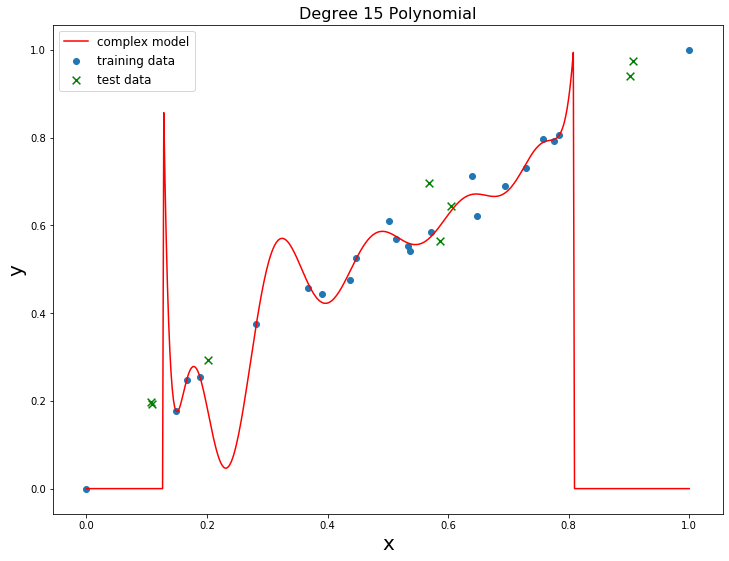

In [844]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_ylabel('y', fontsize=20)
ax1.set_xlabel('x', fontsize=20)
ax1.set_title('Degree 15 Polynomial', fontsize=16)

plt.plot(xx, qq, color='red', label="complex model")
plt.scatter(X_train, y_train, label="training data")
plt.scatter(X_test, y_test, color="green", marker="x", label="test data", s=60)

plt.legend(prop={'size': 12})

In [845]:
# Calculate error for high degree polynomial. Notive that the training error is very low, but the test data is very high.
poly_y_pred_train = poly_reg.predict(poly.fit_transform(X_train))
poly_y_pred_test = poly_reg.predict(poly.fit_transform(X_test))

mean_squared_error(poly_y_pred_train, y_train), mean_squared_error(poly_y_pred_test, y_test)

(0.00030329203817978625, 14.237383596718836)

In [846]:
# Regularize the polynomial model.
from sklearn.linear_model import Ridge

poly_2 = PolynomialFeatures(15)
x2_2 = poly_2.fit_transform(X_train)
poly_reg_2 = Ridge(alpha=0.1).fit(x2_2, y_train)

poly_y_pred_train = poly_reg_2.predict(poly.fit_transform(X_train))
poly_y_pred_test = poly_reg_2.predict(poly.fit_transform(X_test))
poly_reg_2.coef_, poly_reg_2.intercept_

(array([[ 0.00000000e+00,  6.46323700e-01,  2.42118454e-01,
          6.77968825e-02,  2.07122901e-03, -1.83379932e-02,
         -2.12605128e-02, -1.82433227e-02, -1.38550122e-02,
         -9.75280874e-03, -6.41443965e-03, -3.86785206e-03,
         -1.99320532e-03, -6.42601588e-04,  3.17029043e-04,
          9.92465359e-04]]), array([0.1344959]))

In [847]:
poly_reg.coef_, poly_reg_2.intercept_

(array([[ 0.00000000e+00,  1.37931224e+04, -5.24918422e+05,
          8.91612781e+06, -8.96545463e+07,  5.97040027e+08,
         -2.79046302e+09,  9.45874013e+09, -2.36711650e+10,
          4.40389975e+10, -6.07312238e+10,  6.12188627e+10,
         -4.38136730e+10,  2.10771759e+10, -6.10881906e+09,
          8.05777220e+08]]), array([0.1344959]))

In [848]:
mean_squared_error(poly_y_pred_train, y_train), mean_squared_error(poly_y_pred_test, y_test)


(0.0019328898372319556, 0.0021100745089125067)

In [849]:
# Generate lots of points in order to plot the polynomial
xx = np.linspace(0,1,500)
qx = np.array([[i] for i in xx])
qx = poly.fit_transform(qx)
qy = poly_reg_2.predict(qx)

# Filter so that the polynomial doesn't go off the graph.
qq = []
for i in qy:
    if i <= 1 and i >= 0:
        qq.append(i[0])
    else:
        qq.append(0)
qq = np.array(qq)

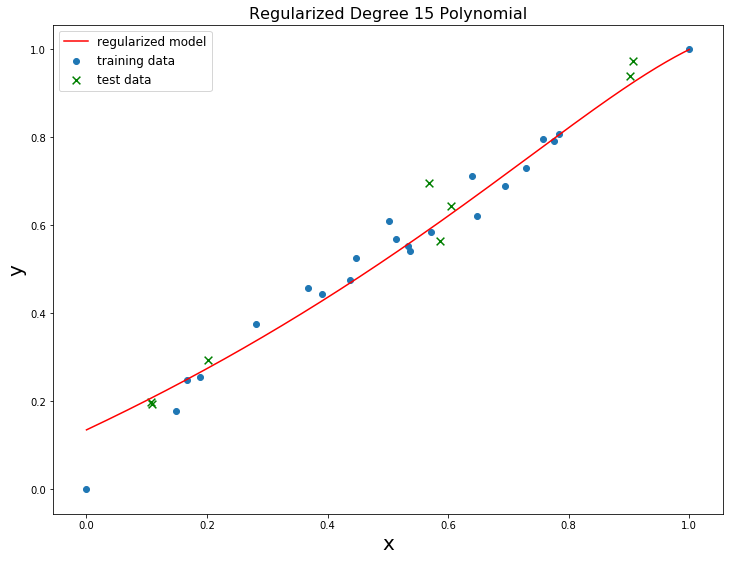

In [850]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_ylabel('y', fontsize=20)
ax1.set_xlabel('x', fontsize=20)
ax1.set_title('Regularized Degree 15 Polynomial', fontsize=16)


plt.plot(xx, qq, color='red', label="regularized model")
plt.scatter(X_train, y_train, label="training data")
plt.scatter(X_test, y_test, color="green", marker="x", label="test data", s=60)

plt.legend(prop={'size': 12})

In [851]:
# Calculate error for regularized high degree polynomial.
poly_2_y_pred_train = poly_reg_2.predict(poly.fit_transform(X_train))
poly_2_y_pred_test = poly_reg_2.predict(poly.fit_transform(X_test))

mean_squared_error(poly_2_y_pred_train, y_train), mean_squared_error(poly_2_y_pred_test, y_test)

(0.0019328898372319556, 0.0021100745089125067)